In [1]:
import os
print os.getcwd()

/Users/weidian1/Documents/GitHub/Udacity-DAND/P5-Intro to ML/Project5/final_project


In [150]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")
#sys.path.append("../pylof-master/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#features_list = ['poi','salary',''] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


## 数据探索

In [151]:
# 异常值， 去掉total
def remove_outerliers(data_dict,names):
    for name in names:
        data_dict.pop(name, 0)
    return data_dict

def dateset_summary(data_dic):
    n_poi,n_non_poi = 0,0
    for key in data_dict.keys():
        if data_dict[key]['poi']==1:
            n_poi+=1
        else:
            n_non_poi+=1        
    print "Total number of data points: ", len(data_dict)
    print "Number of POI: %d, no. of non-POI: %d"% (n_poi, n_non_poi)
    print "Number of features used: ",len(data_dict['METTS MARK']) # randomly pick one name, get the number of features.

outliers_names = ['TOTAL','LAVORATO JOHN J']

data_dict = remove_outerliers(data_dict,outliers_names)
dateset_summary(dateset_summary)

Total number of data points:  144
Number of POI: 18, no. of non-POI: 126
Number of features used:  21


In [108]:
print data_df[email_fatures].apply(NaNs_to_None, axis=0).describe()

        to_messages  from_poi_to_this_person  from_messages  \
count     86.000000                86.000000      86.000000   
mean    2073.860465                64.895349     608.790698   
std     2582.700981                86.979244    1841.033949   
min       57.000000                 0.000000      12.000000   
25%      541.250000                10.000000      22.750000   
50%     1211.000000                35.000000      41.000000   
75%     2634.750000                72.250000     145.500000   
max    15149.000000               528.000000   14368.000000   

       from_this_person_to_poi  shared_receipt_with_poi  
count                86.000000                86.000000  
mean                 41.232558              1176.465116  
std                 100.073111              1178.317641  
min                   0.000000                 2.000000  
25%                   1.000000               249.750000  
50%                   8.000000               740.500000  
75%                  24.75

In [153]:
import pandas as pd
import numpy as np

data_df = pd.DataFrame.from_dict(data_dict,orient='index')

financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus'
                 , 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses'
                 , 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock'
                 , 'director_fees']
email_fatures = ['to_messages','from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi'
                 , 'shared_receipt_with_poi']  # remove 'email_address'
def NaNs_to_0s(col):
    return [0 if ele=='NaN' else ele for ele in col]

def NaNs_to_None(col):
    return [None if ele=='NaN' else ele for ele in col]

def count_NAN(col):
    return sum(1 for ele in col if ele == 'NaN')

data_df[financial_features] = data_df[financial_features].apply(NaNs_to_0s, axis=0)
data_df['poi'] = data_df['poi'].astype(int)
print data_df.apply(count_NAN, axis=0)   

salary                        0
to_messages                  59
deferral_payments             0
total_payments                0
exercised_stock_options       0
bonus                         0
restricted_stock              0
shared_receipt_with_poi      59
restricted_stock_deferred     0
total_stock_value             0
expenses                      0
loan_advances                 0
from_messages                59
other                         0
from_this_person_to_poi      59
poi                           0
director_fees                 0
deferred_income               0
long_term_incentive           0
email_address                34
from_poi_to_this_person      59
dtype: int64


## plot

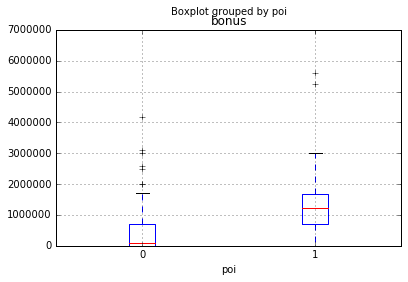

In [154]:
%matplotlib inline
data_df.boxplot('bonus', by='poi')

## add new features

In [155]:
"""
make new feature 
1. 'email_features_miss': if email_features is missing. next step, missing email_features will be
transformed to 0, which should by different from missing financial features.   
2. poi_rate_to_messages = from_this_person_to_poi/to_messages  
3. poi_rate_from_messages = from_poi_to_this_person/from_messages

"""
data_df['email_features_miss'] = data_df.apply(lambda x: 1 if x["to_messages"]=='NaN' else 0, axis = 1)

data_df['poi_rate_to_messages'] = data_df.apply(lambda x: 0 if x['from_this_person_to_poi']=='NaN' \
                                                else x['from_this_person_to_poi']*1.0/x['to_messages'], axis=1)

data_df['poi_rate_from_messages'] = data_df.apply(lambda x: 0 if x['from_poi_to_this_person']=='NaN'\
                                                  else x['from_poi_to_this_person']*1.0/x['from_messages'], axis =1)



    

In [156]:
"""create new features
"""
def get_new(col,p):
    return (data_df[col].apply(abs)/(10**(p-1))%10).astype(int)
def over_zero(ele):
    if ele>0:
        return 1
    return 0

def add_new_features(df):
    df["bonus_over_zero"] = df['bonus'].apply(over_zero)
    df["bonus_six"] = get_new("bonus",6)
    df["bonus_seven"] = get_new("bonus",7)
    
    df["expenses_over_zero"] = df["expenses"].apply(over_zero)
    df["expenses_five"] = get_new("expenses",5)
    df["expenses_six"] = get_new("expenses",6)
    
    df["exercised_stock_options_over_zero"] = df["exercised_stock_options"].apply(over_zero)
    df["exercised_stock_options_six"] = get_new("exercised_stock_options",6)
    df["exercised_stock_options_seven"] = get_new("exercised_stock_options",7)
    df["exercised_stock_options_eight"] = get_new("exercised_stock_options",8)
    
    df["salary_over_zero"] = df["salary"].apply(over_zero)
    df["salary_six"] = get_new("salary",6)
    df["salary_seven"] = get_new("salary",7)
    
    df["restricted_stock_over_zero"] = df["restricted_stock"].apply(over_zero)
    df["restricted_stock_six"] = get_new("restricted_stock",6)
    df["restricted_stock_seven"] = get_new("restricted_stock",7)
    df["restricted_stock_eight"] = get_new("restricted_stock",8)
    
    df["deferred_income_over_zero"] = df["deferred_income"].apply(over_zero)
    df["deferred_income_five"] = get_new("deferred_income",5)
    df["deferred_income_six"] = get_new("deferred_income",6)
    df["deferred_income_seven"] = get_new("deferred_income",7)
    
    df["other_over_zero"] = df["other"].apply(over_zero)
    df["other_six"] = get_new("other",6)
    df["other_seven"] = get_new("other",7)
    df["other_eight"] = get_new("other",8)
    return df

data_df = add_new_features(data_df)

## get mydata(dic)

In [158]:
features_full_list = list(data_df.columns.values)
features_full_list.remove('email_address')
features_full_list.remove('poi')
features_full_list = ['poi'] +features_full_list
data_full_dic = data_df.to_dict(orient='index')


def get_train_test_dataset(my_dataset,features_list):
    #Extract features and labels from dataset for local testing
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    # TODO: Shuffle the data
    from sklearn.utils import shuffle
    features, labels = shuffle(features, labels, random_state=1)
    
    # split train test dataset
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    
    return X_train, X_test, y_train, y_test
    
X_train, X_test, y_train, y_test = get_train_test_dataset(data_full_dic,features_full_list)  
    
    

## scaler

In [159]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [160]:
X_test_scaled

array([[ 0.        ,  0.03782428,  0.01569801, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.01726919, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.04746188,  0.01569801, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.01569801, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.01531454,  0.29875641, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.03631096,  0.23942174,  0.01569801, ...,  0.        ,
         0.        ,  0.        ]])

## select features

In [39]:
"""
select important features 
"""
def select_features(X_train,y_train,X_test, method='tree',k=None):
    from sklearn.utils import shuffle
    X_train, y_train = shuffle(X_train, y_train, random_state=0)
    if method == 'tree':
        
        from sklearn.ensemble import ExtraTreesClassifier
        from sklearn.feature_selection import SelectFromModel   

        selection_tree = ExtraTreesClassifier(random_state=32)
        selection_tree = selection_tree.fit(X_train, y_train)

        model_tree = SelectFromModel(selection_tree, prefit=True)
        X_train_new = model_tree.transform(X_train)
        X_test_new = model_tree.transform(X_test)
        
        print "shape of X_train: ", X_train.shape
        print "shape of X_train_new: ", X_train_new.shape    
        return selection_tree,X_train_new,X_test_new
    
    elif method == 'kbest' and k:
        from sklearn.feature_selection import SelectKBest
        from sklearn.feature_selection import f_classif

        selection_k= SelectKBest(f_classif, k=k).fit(X_train, y_train)
        X_train_new = selection_k.transform(X_train)
        X_test_new = selection_k.transform(X_test)
        print "shape of X_train: ", X_train.shape
        print "shape of X_train_new: ", X_train_new.shape   
        return selection_k,X_train_new,X_test_new
        
    




In [161]:
selection_tree,X_train_new,X_test_new = select_features(X_train_scaled,y_train,X_test_scaled)


shape of X_train:  (100, 47)
shape of X_train_new:  (100, 20)


In [141]:
selection_k,X_train_new,X_test_new = select_features(X_train_scaled,y_train,X_test_scaled,method='kbest',k=20)

shape of X_train:  (101, 47)
shape of X_train_new:  (101, 20)


## train algorithm

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
def train_model(classifier,features_train,labels_train,features_test):
    clf = classifier
    clf.fit(features_train, labels_train)
    labels_pred = clf.predict(features_test)
    return clf,labels_pred

## evaluation metrics

In [42]:
def evaluation_metric(labels_test,labels_pred):
    from sklearn.metrics import recall_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import f1_score
    
    print "recall_score: ",recall_score(y_test, labels_pred)
    print "precision_score: ",precision_score(labels_test, labels_pred)  
    print "f1_score: ",f1_score(labels_test, labels_pred)  
  

### 用tree 的到的features，建模，问题
navie bayers 和 decision tree 完全反的;    
SVM，randomforest 出现no TP

In [162]:
# naive bayers
clf_nb,y_pred_nb = train_model(GaussianNB(),X_train_new,y_train,X_test_new)
evaluation_metric(y_test,y_pred_nb)

recall_score:  0.222222222222
precision_score:  0.0714285714286
f1_score:  0.108108108108


In [163]:
#svm
clf_svm,y_pred_svm = train_model(SVC(),X_train_new,y_train,X_test_new)
evaluation_metric(y_test,y_pred_svm)

recall_score:  0.0
precision_score:  0.0
f1_score:  0.0


In [164]:
# decision tree
clf_dtree,y_pred_stree = train_model(tree.DecisionTreeClassifier(),X_train_new,y_train,X_test_new)
evaluation_metric(y_test,y_pred_stree)

recall_score:  0.111111111111
precision_score:  0.142857142857
f1_score:  0.125


In [165]:
# random forest

clf_froest,y_pred_forest = train_model(RandomForestClassifier(n_estimators=10),X_train_new,y_train,X_test_new)
evaluation_metric(y_test,y_pred_forest)

recall_score:  0.0
precision_score:  0.0
f1_score:  0.0


## Kbest 

In [166]:
# naive bayers
clf_nb,y_pred_nb = train_model(GaussianNB(),X_train_new,y_train,X_test_new)
evaluation_metric(y_test,y_pred_nb)

recall_score:  0.222222222222
precision_score:  0.0714285714286
f1_score:  0.108108108108


In [167]:
#svm
clf_svm,y_pred_svm = train_model(SVC(),X_train_new,y_train,X_test_new)
evaluation_metric(y_test,y_pred_svm)

recall_score:  0.0
precision_score:  0.0
f1_score:  0.0


In [168]:
# decision tree
clf_dtree,y_pred_stree = train_model(tree.DecisionTreeClassifier(),X_train_new,y_train,X_test_new)
evaluation_metric(y_test,y_pred_stree)

recall_score:  0.111111111111
precision_score:  0.166666666667
f1_score:  0.133333333333


In [169]:
# random forest

clf_froest,y_pred_forest = train_model(RandomForestClassifier(n_estimators=10),X_train_new,y_train,X_test_new)
evaluation_metric(y_test,y_pred_forest)

recall_score:  0.0
precision_score:  0.0
f1_score:  0.0
